The alg used in task A is KNN and logistic regression. This is the file for logistic regression.

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [160]:
trainpath='./dataset/taska/' 
testpath='./test/taska/'

transform = transforms.Compose([transforms.Resize((128,128)), #set transfrom type: 128x128 resolution, grayscale image
transforms.Grayscale(num_output_channels=1)])
traindata = datasets.ImageFolder(trainpath, transform) #load the data and the transformation type
testdata = datasets.ImageFolder(testpath, transform)
imagedata = []
imagelabel = []

for image,label in traindata: #change image data from PIL to array

    imagenp = np.array(image, dtype=np.float32)
    imagenp = imagenp.flatten().tolist()
    imagedata.append(imagenp)#add each image list to a big list
    imagelabel.append(label)

imagetest=[]
imagetestlabel=[]

for image,label in testdata:
    
    imagenp = np.array(image, dtype=np.float32)
    imagenp = imagenp.flatten().tolist()
    imagetest.append(imagenp)
    imagetestlabel.append(label)

In [161]:
imagedata = np.array(imagedata) #transform data to numpy array
imagelabel = np.array(imagelabel)
imagetest = np.array(imagetest)
imagetestlabel = np.array(imagetestlabel)

x_train, x_test, y_train, y_test = train_test_split(imagedata, imagelabel, test_size=0.1,random_state=1)

In [162]:
logreg = LogisticRegression(solver='newton-cg') # build model: Logistic Regression
logreg.fit(x_train, y_train) # train model
y_pred= logreg.predict(x_test)

In [163]:
targetnames = ['No tumor', 'tumor']
print(classification_report(y_test, y_pred, target_names=targetnames))

              precision    recall  f1-score   support

    No tumor       0.78      0.70      0.74        46
       tumor       0.95      0.96      0.96       254

    accuracy                           0.92       300
   macro avg       0.86      0.83      0.85       300
weighted avg       0.92      0.92      0.92       300



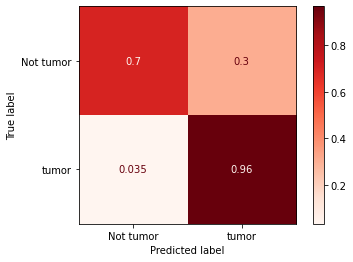

In [164]:
conf = confusion_matrix(y_test, y_pred, normalize='true')
dis = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['Not tumor', 'tumor'])
dis = dis.plot(cmap=plt.cm.Reds)
plt.show()

In [165]:
error = mean_squared_error(y_test,y_pred)
print('Mean squared error is:'+str(error))

Mean squared error is:0.07666666666666666


Test dataset

In [166]:
y_pred1= logreg.predict(imagetest)
targetnames = ['No tumor', 'tumor']
print(classification_report(imagetestlabel, y_pred1, target_names=targetnames))

              precision    recall  f1-score   support

    No tumor       0.87      0.73      0.79        37
       tumor       0.94      0.98      0.96       163

    accuracy                           0.93       200
   macro avg       0.91      0.85      0.88       200
weighted avg       0.93      0.93      0.93       200



In [167]:
error = mean_squared_error(imagetestlabel,y_pred1)
print('Mean squared error is:'+str(error))

Mean squared error is:0.07


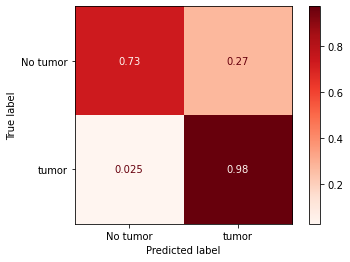

In [168]:
conf = confusion_matrix(imagetestlabel, y_pred1, normalize='true')
dis = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['No tumor', 'tumor'])
dis = dis.plot(cmap=plt.cm.Reds)
plt.show()